<a href="https://colab.research.google.com/github/swarntam/Play_Store_App_Review_Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

The Play Store apps data has enormous potential to drive app-making businesses to success. <br>
**Actionable insights can be drawn** for developers to work on and capture the Android market.<br>Each app (row) has values for catergory, rating, size, and more. <br>Another dataset contains customer reviews of the android apps.<br>**Explore and analyze the data to discover key factors responsible for app engagement and success**







## **Datasets**
1.[ Play Store Data.csv](https://drive.google.com/file/d/1IDsTM0qvnWzOsa2Y8DQIR18t46sDH7nI/view?usp=sharing)
2. [User Reviews.csv](https://drive.google.com/file/d/18c-Jce1rhQleCcLu8sPgiCLmlu-wkeFp/view?usp=sharing)

### Snapshot of Raw Datasets.
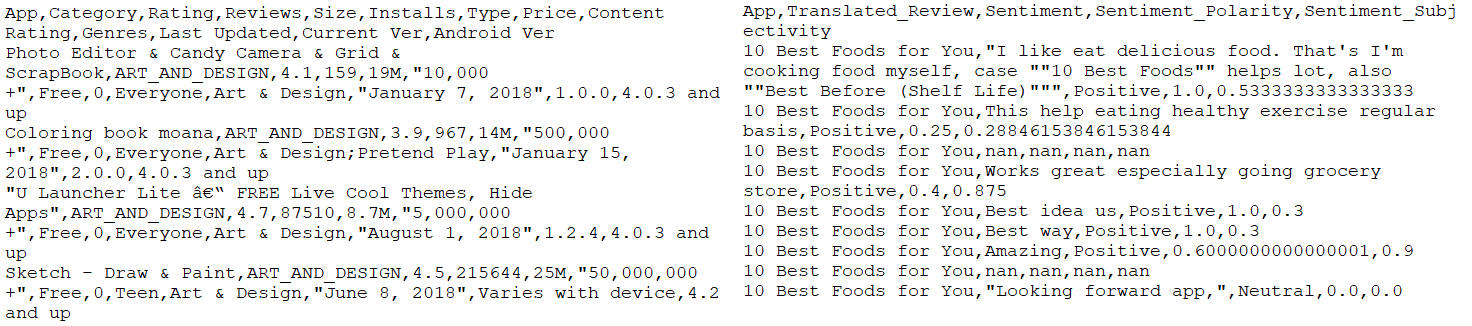

These comma separated values might look clusmy as of now . But don't worry I'm going to be using my tools and more of like best friends .<br>
By the way official name is `Libraries`.

1. **Numpy** for crunching numbers and fast operations.
2. **Pandas** for (*eye-catching*) Data Frames and powerful methods.
3. **Matplotlib** for data visualizations.
4. **Seaborn** on top of matplotlib for beauty.



## **Setting up the Workspace !**

In [2]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the theme for all plots.
sns.set_theme()

In [3]:
# Mounting the drive for datasets loading.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the datasets in Python environment. 
file_path = '/content/drive/My Drive/Colab Notebooks/AlmaBetter' \
            + '/Capstone Projects/Exploratory Data Analysis' \
            + '/Play Store App Review Analysis'

data_df = pd.read_csv(file_path + '/Play Store Data.csv')
reviews_df = pd.read_csv(file_path +'/User Reviews.csv')

print('Data Loaded Successfully !')

Data Loaded Successfully !


## **But why should we do Exploratory Data Analysis ?**

If I've to sum it up in one line -<br>
`" It's simple!  To get sense of data and determine its potential"`

*Gone are the days when decisions were made on intitution and past experiences.* <br> Now, we all trust **data-driven** insights because data can't lie ! 
We make **inferences** about people and take business decisions based on data we have. It's the data that guides us how to proceed further.


EDA helps in identifying the errors,data validation,data cleaning and imputing missing values. EDA helps in selecting the right tools, approaches and statistical models to use for extracting information from data. It helps in discovering patterns, anamoly detection, and visualizing the data to get better understanding of data. It helps in understanding the relationship between different variables. EDA helps in creating new features out of available ones. EDA helps in determing the right Machine Learning models for datasets.

Basically, EDA is the first step before making any inferences from data.

## **A Quick Look of data we have !** 

### 1. <u> Play Store Data

In [5]:
# Glimpse of top rows.
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Glimpse of bottom rows.
data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**You might be wondering why I did both `.head()` and `.tail()` method ?**<br>
Well, we got idea of how data is stored in first method only.
But, to ensure data consistency I did second method too.
And yes it passed but not with flying colors. 

It's worthwile to mention data doesn't always come neat and clean.

In [7]:
# Getting the shape of data.
data_df.shape

(10841, 13)

 **Observations**
1. I was kind of expecting short names for app or popular names. But here, we have like full details of app.
2. Most of columns have categorical values.
3. And there are some columns which seems like numbers but they are not. I'll tell you later.
4. I've noticed 1 `Nan` value , so we can expect missing values.
5. These `Varies with device` value is going to be interesting.

### 2. <u>Users Reviews

In [8]:
# Glimpse of top rows.
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
# Glimpse of bottom rows.
reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [10]:
# Getting the shape of data.
reviews_df.shape

(64295, 5)

**Observations**
1. It might look confusing at first as there is repetition of App Names.
2. Actually, there are multiple reviews of same app by multiple users.
3. I'll not comment about `NaN` values of the last 5 rows as of now.
4. From what I can deduce, there are reviews from other languages translated to English language. It makes sense as different countries have different language and Android has huge market.
5. Sentiment analysis has been done on reviews.

P.S -
1. `Nan` values doesn't violate data consistency. It just represents absence of value.
2. Sentiment Analysis is a type of text-mining  which company uses to find social sentiment of their product or service from the raw text information.
Check out [this Medium blog](https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17)  to know more about it.




### **Do all apps present in *reviews_df* are in *data_df* ?**

In [11]:
# Ceating set of unique apps in both datasets.
reviews_apps = set(reviews_df['App'].unique().tolist())
data_apps = set(data_df['App'].unique().tolist())

# checking whether apps which were reviewed are in data_df.
reviews_apps.issubset(data_apps)

False

Let's see how many apps present in reviews_apps are not in data_apps.

In [12]:
non_matching_apps = []

for app in reviews_apps :
    if app not in data_apps:
        non_matching_apps.append(app)
        
len(non_matching_apps)        

54

We have 54 different apps in reviews_df.

## **Data Wrangling !**

Now, the most important process before Analysing Data.<br>
I'm going to check for missing values,any errors, enriching the raw data and more, to make the data more understandable and neat !

### Checking for duplicates.

1. <u>Play Store Data

In [13]:
# Number of duplicate enteries.
sum(data_df.duplicated())

483

In [14]:
# Finding duplicate records' indexes.
duplicates = data_df[data_df.duplicated()]
duplicates_indexes = duplicates.index.to_list()
len(duplicates_indexes)

483

There are 483 duplicate records.<br>
I'll drop duplicates.

In [15]:
# Dropping duplicate records.
data_df.drop(duplicates_indexes,axis=0,inplace=True)

2. <u>Users Reviews

In [16]:
# Number of duplicate enteries.
sum(reviews_df.duplicated())

33616

These numbers are huge. There's a strong possibilty null values are also accounted for. <br>
Let's have a look at duplicate records.

In [17]:
reviews_df[reviews_df.duplicated()].isnull().sum()

App                           0
Translated_Review         25881
Sentiment                 25881
Sentiment_Polarity        25881
Sentiment_Subjectivity    25881
dtype: int64

There are equal number of missing values for all columns leaving app name.
So, I can safely drop them. I'll explain why I didn't impute missing values later on.  

In [18]:
# Finding duplicate records' indexes.
duplicates2 = reviews_df[reviews_df.duplicated()]
duplicates_indexes2 = duplicates2.index.to_list()
len(duplicates_indexes2)

33616

In [19]:
# Dropping the duplicate records.
reviews_df.drop(duplicates_indexes2,axis=0,inplace=True)

### Missing Values Analysis and Treatment

1. <u> Play Store Data

In [20]:
# Checking for missing values.
data_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

There are some columns having missing values.<br>
That's OK. But what is **not OK** the missing values in Rating.
Rating could be key indicator of App Suceess or Failure!<br>
After all `CUSTOMER SATISFACTION IS TOP PRIORITY !`

In [21]:
# Finding out number of missing values in missing columns.
missing_cols = [x for x in data_df if data_df[x].isnull().any()]
missing_values_total = [data_df[x].isnull().sum() for x in missing_cols]
missing_perct = [round(x/len(data_df),4) for x in missing_values_total]

missing_cols_df1 = pd.DataFrame({'Columns': missing_cols,
                                 'No. of missing values': missing_values_total,
                                 '%': missing_perct})

missing_cols_df1

,Columns,No. of missing values,%
0,Rating,1465,0.1414
1,Type,1,0.0001
2,Content Rating,1,0.0001
3,Current Ver,8,0.0008
4,Android Ver,3,0.0003


1. No missing column attract attention as they don't even contribute to 1 % of data.
2. Well, we kind of need to impute Rating values, just because of one column having missing value , dropping them would result in loss of other information. 1400 + records may not be 1%, but they are good amount of numbers.
3. As the missing values are very less ,I'll impute all of them.

 `Rating`

In [22]:
# Summary statistics for Rating.
data_df['Rating'].describe()

count    8893.000000
mean        4.189542
std         0.545452
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [23]:
# Unique Ratings.
data_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

There are only 5 options to rate on Play Store - 1,2,3,4,5 stars.<br>
It turns out these are average ratings.

Have a look at ratings of an app on Play Store !

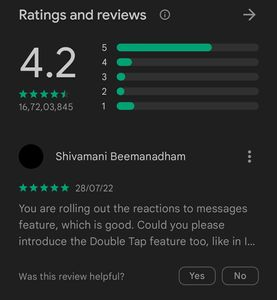

There is one rating which is 19 which is not possible !<br>
There might have been some mistake. <br>
Let's particulary investigate that value - 


In [24]:
# Checking out misleading record.
data_df[data_df['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This particular record is totally messed up.<br>
It is because of this record, `Content Rating` has 1 missing value.
It's like every value has shifted one place left.
I'll correct it.

In [25]:
# Correcting the record
data_df.loc[10472] =['Life Made WI-Fi Touchscreen Photo Frame', np.NaN ,1.9 ,19.0 ,
                    '3.0M','1,000+', 'Free', '0', 'Everyone', np.NaN,
                    'February 11, 2018', '1.0.19', '4.0 and up']

In [26]:
# Check
data_df.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

As the missing values of Rating are not even 1 % , I'll take a very **Layman approach** to impute them.<br>
I'll impute the missing values according to **average rating of respective Category** and in this way , there won't be any bias on summary statistics.

In [27]:
# Category-wise average ratings.
cat_avg_ratings = data_df.groupby('Category')['Rating'].mean()
cat_avg_ratings.head()

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
Name: Rating, dtype: float64

In [28]:
# Getting the index of missing values of Rating.
missing_ratings_indexes = data_df[data_df['Rating'].isnull()].index

# Imputing the missing values.
for i in missing_ratings_indexes :
    category = data_df.loc[i,'Category']
    data_df.loc[i,'Rating'] = cat_avg_ratings.loc[category]

In [29]:
# Check
data_df['Rating'].isnull().sum()

0

`Type`

In [30]:
data_df[data_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.191153,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


As the `Price` is 0,`Type` must be 'Free'.

In [31]:
# Imputing missing value of Type
data_df.loc[9148,'Type'] = 'Free'

`Current Ver`

In [32]:
data_df[data_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.191153,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.191153,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.047411,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.347458,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


For the `Current Ver` , we can impute missing values with 'Varies with device' as we can't be sure about the version.

In [33]:
# Imputing the missing values of Current Ver.
data_df.loc[[15,1553,6322,6803,7333,7407,7730,10342],'Current Ver'] \
                                                        = 'Varies with device'
                                                       

`Genres`

In [34]:
data_df[data_df['Genres'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [35]:
# Checking for most frequently appeared Genres.
data_df['Genres'].mode()

0    Tools
dtype: object

In [36]:
# Checking the Category of Tools Genres.
data_df[data_df['Genres'] == 'Tools']['Category'].unique()

array(['TOOLS'], dtype=object)

From the name of app, it seems like it is a kind of tool and mode of `Genres` is also Tools. I'll impute it with Tools.<br>
For `Category`, all 'Tools' genre has 'TOOLS' category. I'll impute it with same.

In [37]:
# Imputing the missing values for above record.
data_df.loc[10472,'Genres'] = 'Tools'
data_df.loc[10472,'Category'] = 'TOOLS'

`Android Ver`

In [38]:
data_df[data_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [39]:
#  Looking for similar records for Current Ver.
data_df[data_df['Type']=='Paid']['Android Ver'].mode()

0    4.1 and up
dtype: object

In [40]:
#  Looking for similar records for Android Ver.
data_df[data_df['Type']=='Free']['Android Ver'].mode()

0    4.1 and up
dtype: object

For the first record , it makes sense that paid apps can have Android version greater than 4.<br>
For the second record, the rating is high with 10,000+ downloads and so it makes sense it has high Android Version. 

In [41]:
# Imputing the missing values of Android ver.
data_df.loc[4453,'Android Ver'] = '4.1 and up' 
data_df.loc[4490,'Android Ver'] = '4.1 and up'

In [42]:
# Check.
data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

All missing values has been imputed.

2. <u> Users Reviews

In [43]:
reviews_df.shape

(30679, 5)

In [44]:
# Checking for missing values
reviews_df.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

Apart from name of app, all other details are missing for around 982 records. <br> For the 5 values we don't have `Translated_Review` values, but other analysis done on that review are there.<br>
*Looking at numbers , it looks like all missing values except 5 values from `Translated_Review` have same indexes*.

Let's clear the air and be sure !

In [45]:
# Getting list of indexes of missing values for missing columns.
missing_indexes = []

for col in reviews_df.columns[1:]:
    indexes = np.where(reviews_df[col].isna())[0]
    missing_indexes.extend(indexes)
 

In [46]:
len(missing_indexes)

3933

In [47]:
# creating a dictionary of frequency of values.
indexes_freq = {} 

for index_ in missing_indexes :
    indexes_freq[index_] = indexes_freq.get(index_,0) + 1

# Whichever has appeared once are the ones to keep.
indexes_to_keep = [x for x in indexes_freq.keys() \
                   if indexes_freq[x] == 1 ]
indexes_to_keep                   

[160, 8382, 11318, 15271, 25435]

In [48]:
# Checking whether all indexes are same for all missing values.
# Indexes with frequency of 4 are common indexes.
common_indx = {k:v for k,v in indexes_freq.items() if indexes_freq[k] ==4  }
len(common_indx.keys())

982

Above confirms all records having missing values in all 4 missing columns have same indexes. 

I'll **drop** all null rows *excluding the 5 rows which have only textual information missing.*<br>
They are precise textual reviews and sentiment analysis totally dependent on that.

I can't just impute these information.


In [49]:
# Changing the null values of 'Translated_Review' to empty string
reviews_df.iloc[indexes_to_keep,1] = ''

# Checking if empty string has been imputed.
reviews_df.isnull().sum()

App                         0
Translated_Review         982
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

Now, we can simply drop all null values in dataframe.

In [50]:
# Dropping the null values.
reviews_df = reviews_df.dropna()

In [51]:
# Check.
reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### **This raises the question Data Quality or Data Quantity ?**

The answer is clear Data Quality. As Peter Drucker has quoted 'You can't manage what you can not measure. The emphasis on data quality has increased as businesses are moving to data-driven approach for solving a business problem. Some arbitary values to increase data quantity is certainly not helpful. It may led to wrong results. We should always strive for quality data even if it is small.

### **Data Types Analysis**

1. <u> Play Store Data

In [52]:
# Top 3 rows.
data_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [53]:
# Checking data types of columns.
data_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [54]:
data_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [55]:
data_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [56]:
data_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [57]:
data_df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [58]:
data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**Observations**
1. `Reviews` which indicate numbers of reviews are recorded as strings, **it should be integers**.
2. `Installs` seems like numbers but they represent **categories**, hence it is fine.
For the sake of analysis, we can convert it to numbers while keeping in mind these are not absolute number. It could help in setting the ground rules for apps , like having installs > threshold value.
3. `Current Ver` and `Android Ver` are also categorical but they may be represented as ordinal ones. As of now, I'll keep them as it is.
4. `Price` are in dollars, it should be as floats. I'll remove the dollar sign.
5. `Last Updated` is as object datatype, it should be in **date** format.
6. Lastly `Size` have mix compostion , some in KB and some in MB, some Varies with device, one unique value is *1,000+*. I'll convert all values in MB. I'll keep the Varies with device same as it is.

In [59]:
#  Doing the necessary changes.
data_df['Reviews'] = data_df['Reviews'].astype(int)
data_df['Price'] = data_df['Price'].apply(lambda x: float(x.replace('$','')))
data_df['Last Updated'] = pd.to_datetime(data_df['Last Updated'])
data_df['Installs'] = data_df['Installs'].apply(lambda x :int(x.replace('+','')\
                                                              .replace(',','')))

In [60]:
# Creating a function to covert all sizes to MB.
def sizeInMb(text):
    '''This function converts sizes into MB for size variable present in df.'''
    if 'M' in text:
        return float(text.replace('M',''))
    elif 'k' in text:
        size_in_mb = float(text.replace('k','')) / 1024
        return round(size_in_mb,2)
    elif '+' in text :
        size_in_mb = float(text.replace('+','').replace(',','')) / 1024
        return  round(size_in_mb,2) 
    else :
        return text          

In [61]:
# Applying the function to size variable
data_df['Size'] = data_df['Size'].apply(sizeInMb)

In [62]:
# Data Types Analysis
dtype_unique = data_df.dtypes.unique()
nums_cols = [sum(data_df.dtypes==x) for x in dtype_unique]

pd.DataFrame({'Dtypes':dtype_unique, 'Number of columns':nums_cols})

,Dtypes,Number of columns
0,object,8
1,float64,2
2,int64,2
3,datetime64[ns],1


1. Most of the columns are of** catgorical** data types, i.e** 8** out of 13.
2. **4** columns are **numerical**.
3. **1** column has **date** datatype.

2. <u> Users Reviews

In [63]:
# Top 3 rows.
reviews_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


In [64]:
# Data Types Analysis
dtype_unique = reviews_df.dtypes.unique()
nums_cols = [sum(reviews_df.dtypes==x) for x in dtype_unique]

pd.DataFrame({'Dtypes':dtype_unique, 'Number of columns':nums_cols})

,Dtypes,Number of columns
0,object,3
1,float64,2


1. We have 3 columns of nominal categorical information.
2. And 2 columns are numerical.

### Are all `App` names unique *data_df* ?

In [65]:
data_df['App'].nunique() == len(data_df)

False

There are some apps repeated. <br>
Let's have a look on repeated apps -

In [66]:
app_counts = data_df['App'].value_counts().reset_index()
app_counts.columns = ['App','Counts']
multi_apps = app_counts[app_counts['Counts'] > 1 ]
print('Number of Apps repeated = ',len(multi_apps),'\n')
multi_apps.head()

Number of Apps repeated =  523 



,App,Counts
0,ROBLOX,9
1,8 Ball Pool,7
2,Bubble Shooter,6
3,Helix Jump,6
4,Zombie Catchers,6


Let's have a closer look on some of repeated apps - 

In [67]:
data_df[data_df['App'] == 'ROBLOX' ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [68]:
data_df[data_df['App'] =='Helix Jump']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1663,Helix Jump,GAME,4.2,1497361,33.0,100000000,Free,0.0,Everyone,Action,2018-04-09,1.0.6,4.1 and up
1749,Helix Jump,GAME,4.2,1498648,33.0,100000000,Free,0.0,Everyone,Action,2018-04-09,1.0.6,4.1 and up
1792,Helix Jump,GAME,4.2,1499373,33.0,100000000,Free,0.0,Everyone,Action,2018-04-09,1.0.6,4.1 and up
1918,Helix Jump,GAME,4.2,1500999,33.0,100000000,Free,0.0,Everyone,Action,2018-04-09,1.0.6,4.1 and up
1969,Helix Jump,GAME,4.2,1500622,33.0,100000000,Free,0.0,Everyone,Action,2018-04-09,1.0.6,4.1 and up
4182,Helix Jump,GAME,4.2,1485806,33.0,100000000,Free,0.0,Everyone,Action,2018-04-09,1.0.6,4.1 and up


In [69]:
data_df[data_df['App'] =='Bubble Shooter']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1657,Bubble Shooter,GAME,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
1711,Bubble Shooter,GAME,4.5,148895,46.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
1875,Bubble Shooter,GAME,4.5,148945,46.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
1972,Bubble Shooter,GAME,4.5,148990,46.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
2041,Bubble Shooter,FAMILY,4.4,59843,20.0,5000000,Free,0.0,Everyone,Puzzle;Brain Games,2018-01-09,2.3.3122,2.3 and up
3894,Bubble Shooter,GAME,4.5,43576,50.0,5000000,Free,0.0,Everyone,Arcade,2017-09-13,4.4,2.3 and up


After manually going through some of the records, I found that there isn't much difference among all. The `Reviews` somehow are different .
I'll take only one record of them whichever has maximum number of reviews.

In [70]:
# Getting list of repeated apps from multi_apps df.
repeated_apps_list = multi_apps['App'].to_list()
len(repeated_apps_list)

523

In [71]:
# Getting list of indexes to drop.
indexes_list = []

for app in repeated_apps_list :
    reviews_ = data_df[data_df['App']==app]['Reviews']
    indexes_ = reviews_.sort_values(ascending=False).index
    indexes_to_remove = list(indexes_[1:])
    indexes_list.extend(indexes_to_remove)

len(indexes_list)

698

In [72]:
# Removing repeated 'App' enteries
data_df.drop(indexes_list,axis=0,inplace=True)

In [73]:
# Check.
data_df['App'].value_counts(ascending=False)

Photo Editor & Candy Camera & Grid & ScrapBook    1
Free Fur All – We Bare Bears                      1
Just A Regular Arcade                             1
Soundtrack Attack                                 1
[adult swim]                                      1
                                                 ..
Mali J                                            1
J-UFO                                             1
Cut the Rope GOLD                                 1
The Voice, sing and connect                       1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

Now, there are unique enteries for each app.

# **Exploratory Data Analysis**

Since, there are two datsets. I've decided to analyse them separately. And then ,Combined Analysis.

## 1.<u><b> Play Store Data

In [74]:
# Getting the final shape of data after data cleaning.
data_df.shape

(9660, 13)

In [75]:
# Summary of data.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9660 non-null   object        
 12  Android Ver     9660 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


### Rating Variable

In [76]:
# Summary of Rating vriable.
data_df['Rating'].describe()

count    9660.000000
mean        4.173623
std         0.495756
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

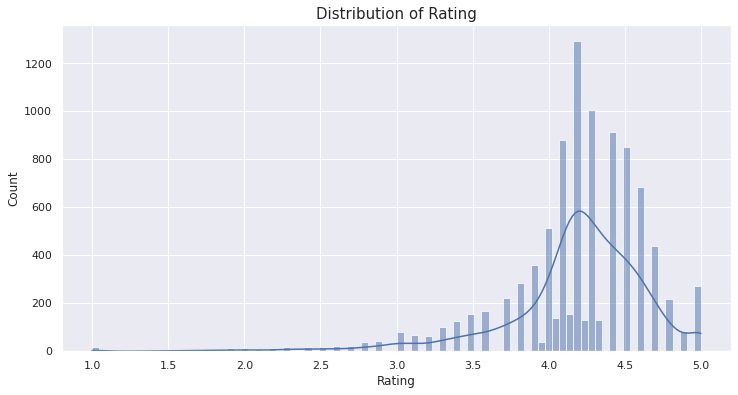

In [77]:
#  Plotting the histogram of Rating.
plt.figure(figsize=(12,6))
sns.histplot(x='Rating',kde=True,data=data_df)
plt.title('Distribution of Rating',size=15)
plt.show()

In [78]:
data_df['Rating'].skew()

-1.885510973795169

1. Most of the apps has average rating between **4 to 4.5**.
2. The distribution is left-skewd.
3. There are few apps which has lower ratings going down to 1.
4. Having Rating **> 4** should be priority of App developers as median rating is 4.2.

### Free Vs Paid Apps

Let's see the market share of Free Vs Paid Apps.

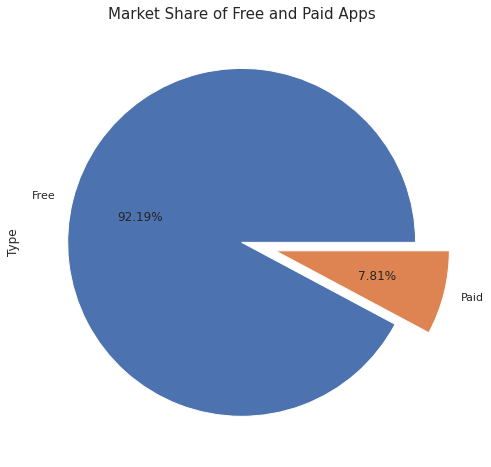

In [79]:
data_df['Type'].value_counts().plot(kind='pie',
                                    figsize=(12,8),
                                    explode=[0.0,0.2],
                                    autopct='%1.2f%%')
plt.title('Market Share of Free and Paid Apps',size=15)
plt.show()                 

1. Free apps **dominate** the Android Market. This is expected from Android Community as majority of Android phones are chaeaper.<br>
2. Comparing the apps of free and paid would **not** be appropriate as more than **92%** of data belongs to free apps.


### Paid Apps

We can't get exact approximation of total revenue generrated by Paid apps, as installs are in categories like 10000+,10+ etc , but we can get idea of how much revenues are generated if we treat those as numbers.

In [80]:
# Total Revenue generated by Paid apps.
paid_apps = data_df[data_df['Type']=='Paid'].copy()
paid_apps['Revenues'] = paid_apps['Installs'] * paid_apps['Price']
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenues
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.000000,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,399000.0
478,Truth or Dare Pro,DATING,3.971698,0,20.0,50,Paid,1.49,Teen,Dating,2017-09-01,1.0,4.0 and up,74.5
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,3.971698,0,0.02,100,Paid,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0 and up,299.0


In [81]:
# Total Revenues generated on Play Store
paid_apps['Revenues'].sum()

291140168.79

A total of **$ 291,140,168.80** was generated from paid apps.

Let's have a look on top 5 paid apps.

In [82]:
# Getting Top 5 highest revenue generating apps.
paid_apps.sort_values(by='Revenues',ascending=False)[:5][['App','Installs',
                            'Category','Rating','Reviews','Price','Revenues']]

,App,Installs,Category,Rating,Reviews,Price,Revenues
2241,Minecraft,10000000,FAMILY,4.5,2376564,6.99,69900000.0
5351,I am rich,100000,LIFESTYLE,3.8,3547,399.99,39999000.0
5356,I Am Rich Premium,50000,FINANCE,4.1,1867,399.99,19999500.0
4034,Hitman Sniper,10000000,GAME,4.6,408292,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,1000000,GAME,4.4,348962,6.99,6990000.0


In [83]:
# Top 5 most expensive apps.
paid_apps.sort_values(by='Price',ascending=False)[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenues
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,4000000.0
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,3999900.0
5369,I am Rich,FINANCE,4.3,180,3.8,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,1999950.0
5358,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,399990.0
5359,I am rich(premium),FINANCE,3.5,472,0.94,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,1999950.0
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,1999950.0
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,399990.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,19999500.0
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,39999.0
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,3999900.0


1. **Minecraft** has generated highest revenues with an excellent average rating considering it has more than 10 million downloads.
2. **Hitman Sniper** is the most successful **game** in paid apps with excellent average rating.
3. **I am rich** Franchise has the most expensive apps with an whooping price $400.

*Fun Fact* : **I'm Rich** app is for sole purpose of showing off as it has no other functionalities. It was first released on IOS.<br>
[Reference](https://en.wikipedia.org/wiki/I_Am_Rich)

### Content Rating

In [84]:
data_df['Content Rating'].value_counts(normalize=True)

Everyone           0.818219
Teen               0.107246
Mature 17+         0.040683
Everyone 10+       0.033333
Adults only 18+    0.000311
Unrated            0.000207
Name: Content Rating, dtype: float64

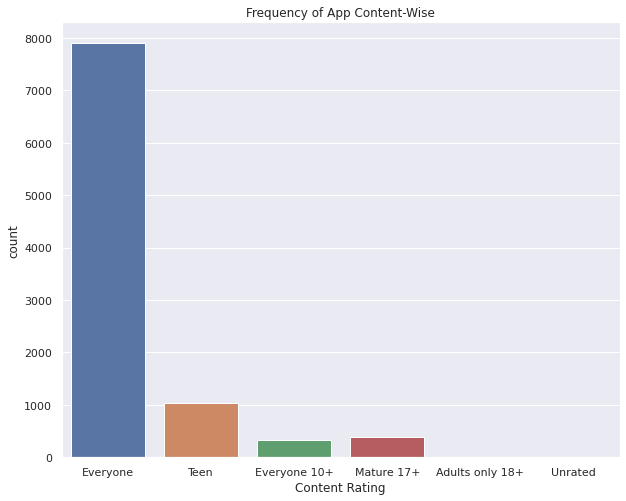

In [85]:
# Plotting Content-Rating wise apps count.
plt.figure(figsize=(10,8))
sns.countplot(x='Content Rating',data=data_df)
plt.title('Frequency of App Content-Wise')
plt.show()

**Observations**
1. Maximum of the apps on the play store are for everyone.


### Categories wise Analysis

Let's see which categories have highest number of apps.

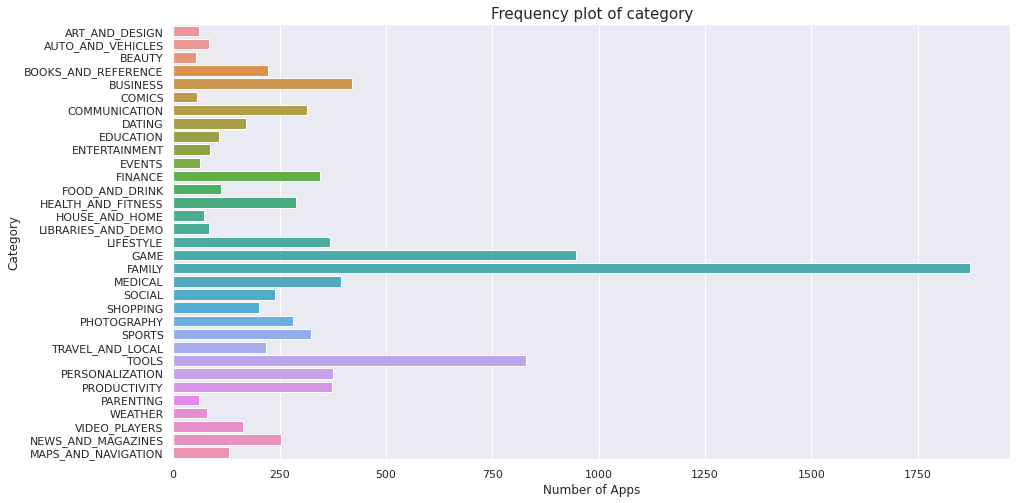

In [86]:
# Visualizing the category counts of apps.
plt.figure(figsize=(15,8))
sns.countplot(y='Category',data=data_df)
plt.xlabel('Number of Apps')
plt.title('Frequency plot of category',size=15)
plt.show()

1. **Family**, **Game** and **Tools** categories have most number of apps.
2. Developer should focus more on above 3 categories as there are a lot of apps in these categories. 

Let's see category wise average ratings.

In [87]:
# Getting the table of category wise ratings.
avg_rat_table = data_df.groupby('Category')['Rating'].mean().reset_index()
avg_rat_table.columns=['Category','Avg. Rating']
avg_rat_table = avg_rat_table.sort_values(by='Avg. Rating')
avg_rat_table.head()

,Category,Avg. Rating
7,DATING,3.978546
19,MAPS_AND_NAVIGATION,4.037946
29,TOOLS,4.038636
31,VIDEO_PLAYERS,4.046684
30,TRAVEL_AND_LOCAL,4.073117


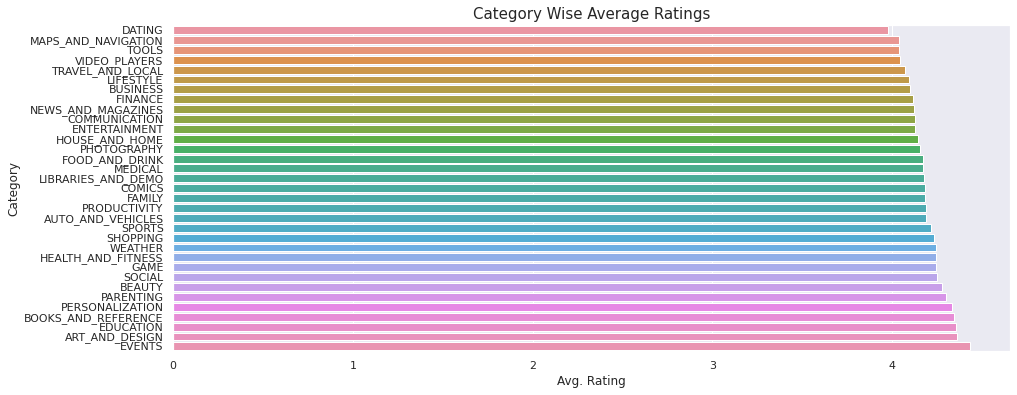

In [88]:
# Visualizing the above table.
plt.figure(figsize=(15,6))
sns.barplot(y='Category',x='Avg. Rating',data=avg_rat_table)
plt.title('Category Wise Average Ratings', size=15)
plt.show()

1. There isn't much of difference of rating for different categories.
2. Though **Events** Category has highest rating but the numbers of apps are less in that category as we saw in the previous graph.
3. We can conclude that Rating of an app **doesn't** depend on Category.

### Does Rating depends on Size of App ?

Let's see the relationship between size and Rating.

For this, I'll create a categorical variable namely `Size Category` and later on analyze on it.

In [89]:
# Defining a function that'll group differnt sizes into categories.
def size_category(size):
    ''' This function returns Size category based on size.'''

    try :
        size = float(size)
        if size <= 1 :
            return '<1 MB'
        elif 1 < size <5 :
            return '1-5 MB'
        elif 5 <=  size < 10 :
            return '5-10 MB'
        elif 10 <= size < 30 :
            return '11-30 MB'
        elif 30 <= size <= 50 :
            return '30-50 MB'  
        else :
            return '50+ MB'  
    except :
       return 'Variable'                             

In [90]:
# Applying the above function to get Size category.
data_df['Size_Category'] = data_df['Size'].apply(size_category)
data_df['Size_Category'].head()

0    11-30 MB
2     5-10 MB
3    11-30 MB
4      1-5 MB
5     5-10 MB
Name: Size_Category, dtype: object

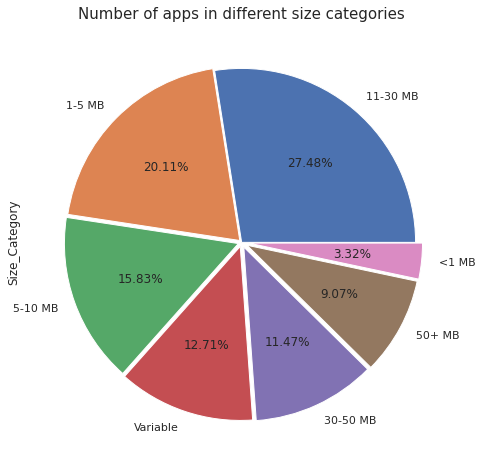

In [91]:
# Checking the number of apps in differnt size category.
explodes = [0,0.015,0.02,0.025,0.03,0.035,0.04]
data_df['Size_Category'].value_counts().plot(kind='pie',
                                             figsize=(12,8),
                                             autopct ='%1.2f%%',
                                             explode=explodes)
plt.title('Number of apps in different size categories',size=15)
plt.show()

1. The most number of apps are between 11 to 30 MB in size.
2. Apps having variable sizes are considerable in number.
3. Lite-weight apps have good market shares.
4. Very few apps are less than 1 MB.

Let's see average ratings of different size category.

In [92]:
data_df.groupby('Size_Category')['Rating'].mean().reset_index()

,Size_Category,Rating
0,1-5 MB,4.137679
1,11-30 MB,4.180171
2,30-50 MB,4.145917
3,5-10 MB,4.158868
4,50+ MB,4.246080
5,<1 MB,4.028702
6,Variable,4.245900


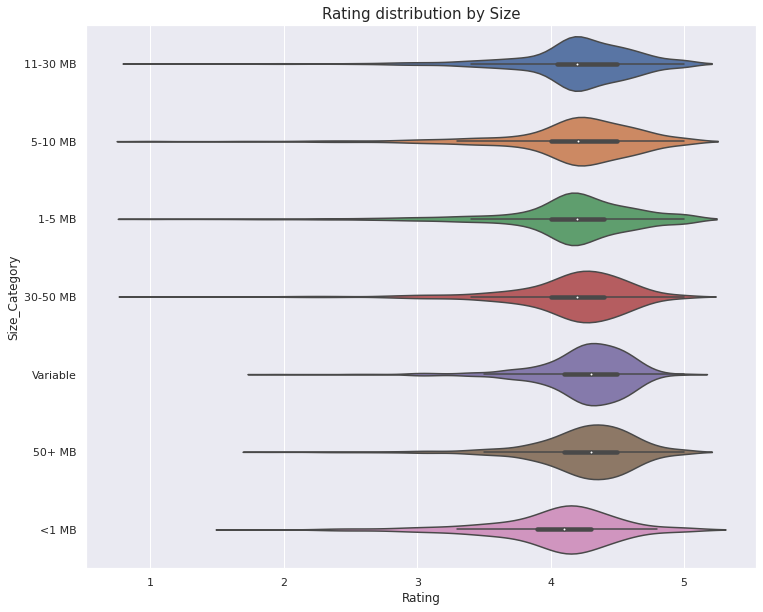

In [93]:
# Plotting distribution of Rating across size.
plt.figure(figsize=(12,10))
sns.violinplot(y='Size_Category',x='Rating',data=data_df)
plt.title('Rating distribution by Size',size=15)
plt.show()

Apps having variable sizes seem to have better rating with the left tail shorter.<br>
We can't say for sure that ratings depend on size.<br>
But, it makes sense as different cellphones have different configuration and keeping app sizes variable means the developer is paying attention to all of the users.

### What are unique genres ? What do Genres tell?

In [94]:
data_df['Genres']

0                   Art & Design
2                   Art & Design
3                   Art & Design
4        Art & Design;Creativity
5                   Art & Design
                  ...           
10836                  Education
10837                  Education
10838                    Medical
10839          Books & Reference
10840                  Lifestyle
Name: Genres, Length: 9660, dtype: object

There are some apps which falls in more than 1 genres.

Let's find out unique genres.

In [95]:
# Getting list of all Genres.
all_genres = []
for genres in data_df['Genres']:
    all_genres.extend(genres.split(';'))
len(all_genres)    

10052

In [96]:
# Getting unique Genres.
unique_genres = set(all_genres)
len(unique_genres)

53

In [97]:
print(unique_genres)

{'Events', 'Travel & Local', 'Action & Adventure', 'Pretend Play', 'Music', 'Dating', 'Brain Games', 'Racing', 'Casual', 'Role Playing', 'Simulation', 'Trivia', 'Casino', 'Maps & Navigation', 'Board', 'Educational', 'Art & Design', 'Finance', 'Parenting', 'Weather', 'Health & Fitness', 'Tools', 'Entertainment', 'Shopping', 'Personalization', 'Productivity', 'Education', 'Lifestyle', 'Video Players & Editors', 'Books & Reference', 'News & Magazines', 'Strategy', 'Word', 'Medical', 'Creativity', 'Puzzle', 'Photography', 'Business', 'Comics', 'Music & Audio', 'Beauty', 'Music & Video', 'Food & Drink', 'Sports', 'Communication', 'Libraries & Demo', 'Adventure', 'Social', 'Arcade', 'Card', 'Auto & Vehicles', 'House & Home', 'Action'}


If we count unique_genres in *all_genres* list, we can find the number of apps belonging to unique genres.<br>
This could give an idea of what kind of apps are in demand.

In [98]:
# Getting the frequency of each unique genre.
unique_genres = list(unique_genres) # List ensures sequence.
genre_count = {}

for genre in unique_genres :
    genre_count[genre] = all_genres.count(genre)

print(genre_count)    

{'Events': 64, 'Travel & Local': 219, 'Action & Adventure': 98, 'Pretend Play': 69, 'Music': 22, 'Dating': 170, 'Brain Games': 63, 'Racing': 108, 'Casual': 225, 'Role Playing': 115, 'Simulation': 206, 'Trivia': 39, 'Casino': 39, 'Maps & Navigation': 131, 'Board': 60, 'Educational': 102, 'Art & Design': 65, 'Finance': 345, 'Parenting': 60, 'Weather': 79, 'Health & Fitness': 290, 'Tools': 830, 'Entertainment': 592, 'Shopping': 202, 'Personalization': 376, 'Productivity': 374, 'Education': 678, 'Lifestyle': 370, 'Video Players & Editors': 165, 'Books & Reference': 225, 'News & Magazines': 254, 'Strategy': 99, 'Word': 23, 'Medical': 395, 'Creativity': 33, 'Puzzle': 142, 'Photography': 281, 'Business': 420, 'Comics': 56, 'Music & Audio': 1, 'Beauty': 53, 'Music & Video': 31, 'Food & Drink': 112, 'Sports': 335, 'Communication': 316, 'Libraries & Demo': 84, 'Adventure': 80, 'Social': 239, 'Arcade': 199, 'Card': 49, 'Auto & Vehicles': 85, 'House & Home': 73, 'Action': 311}


In [99]:
# Converting dictionary to dataframe.
genres_df = pd.DataFrame({'Genres':genre_count.keys(),
                          'Frequency':genre_count.values()})
genres_df = genres_df.sort_values(by='Frequency',ascending=False)
genres_df.head()

,Genres,Frequency
21,Tools,830
26,Education,678
22,Entertainment,592
37,Business,420
33,Medical,395


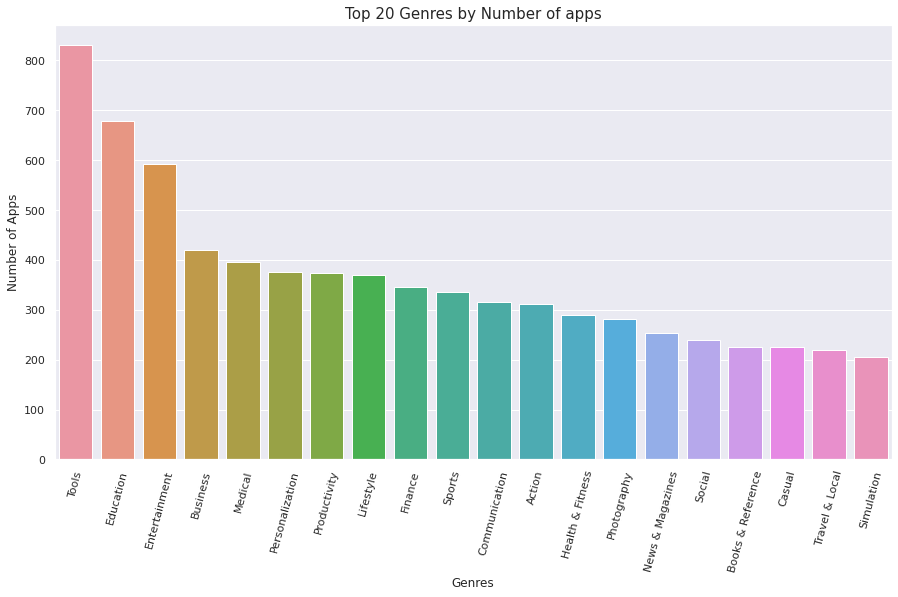

In [100]:
# Plotting top 20 Genres by Number of Apps.
plt.figure(figsize=(15,8))
sns.barplot(x='Genres',y='Frequency',data=genres_df[:20])
plt.ylabel('Number of Apps')
plt.xticks(rotation='75')
plt.title('Top 20 Genres by Number of apps',size=15)
plt.show()

1. People love to use apps which makes their life easy i.e **Tools**, then love to upskill them i.e **Education** and we all need **Entertainment** indeed.
2. Then apps for Business, Medical, Personalization and Lifestyle are gaining popularity.

### Pricing Strategies

Let's see Pricing of apps across different categories.

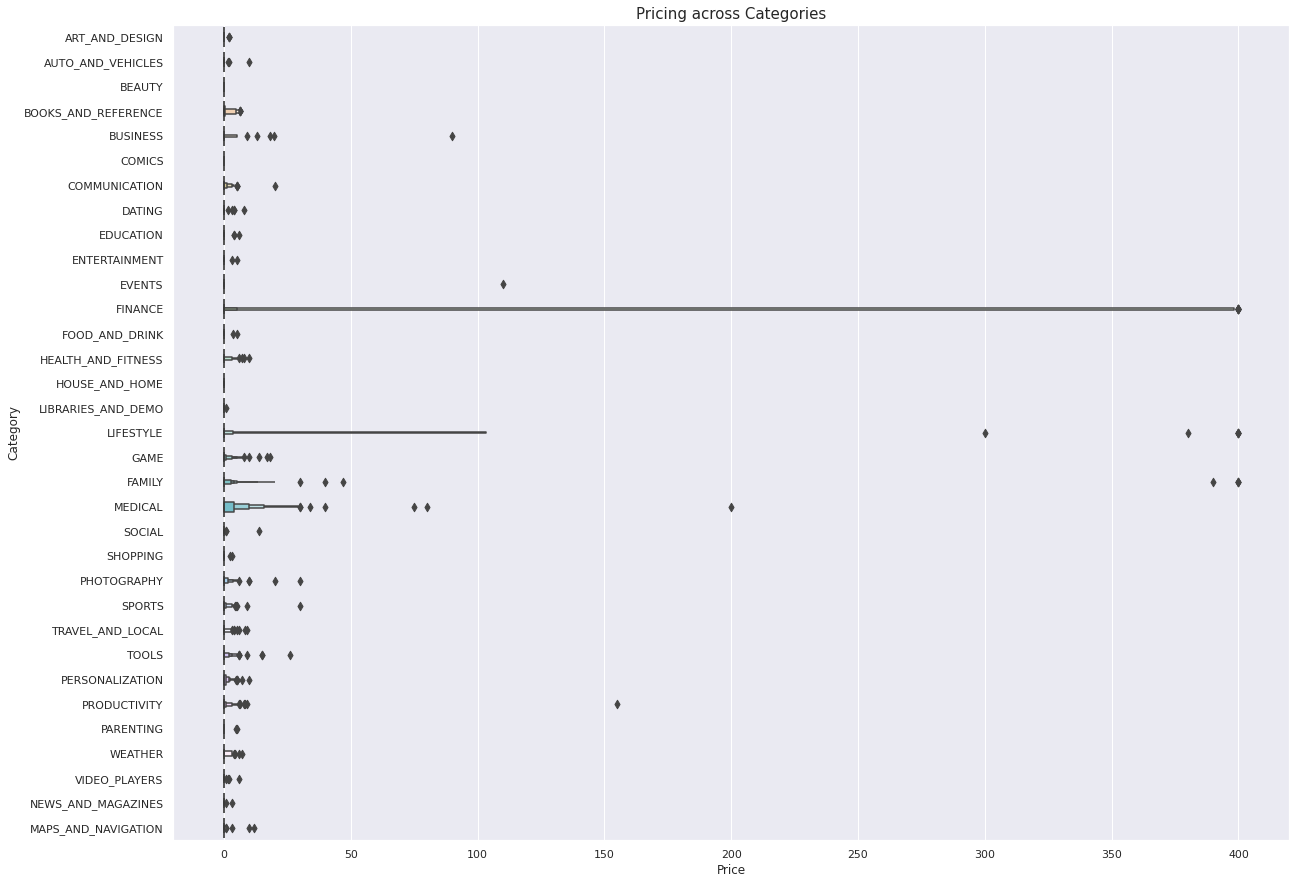

In [101]:
# Plotting pricing of apps across categories.
plt.figure(figsize=(20,15))
sns.boxenplot(y='Category',x='Price', data=data_df)
plt.title('Pricing across Categories',size=15)
plt.show()

**Observations**
1. Paids apps has high potential in **Finance,Lifestyle** and **Medical** categories.
2. Prices for apps belonging to Tools,Game, Productivity , Books and Reference, and Photograpy are compratively low.
3. For Beauty, Parenting, comics,news and magzines, social ,shopping and other,most of the apps are **free**. 

In [102]:
# Finding category of paid apps having maximum installs
paid_apps.groupby('Category')[['Installs','Price']].sum().reset_index()\
                                .sort_values(by='Installs',ascending=False)[:10]

,Category,Installs,Price
9,FAMILY,21149814,2403.85
12,GAME,20999965,284.31
20,PERSONALIZATION,3258794,150.48
21,PHOTOGRAPHY,1878740,118.28
26,TOOLS,1727441,267.25
22,PRODUCTIVITY,1412055,250.93
4,COMMUNICATION,1360050,83.14
25,SPORTS,1243815,100.00
15,LIFESTYLE,1179110,2360.87
29,WEATHER,812000,32.42


Although, price for apps belonging to **Family** and **Game** are lower but they have a **huge market base** !

### Top Popular Apps

Let's find out the most popular apps overall !

In [103]:
data_df.sort_values(by=['Installs','Rating','Reviews'],ascending=False)[:20]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Category
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,Variable
1872,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,50+ MB
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Variable
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Variable
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device,Variable
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,Variable
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,Variable
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Variable
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,Variable
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Variable


**Observations**
1. Most of the top apps are from **Google**. It makes sense as most of the Google apps comes preinstalled in the Android phones.
2. Then the **Meta** apps has more popularity as expected as 3 of the apps from Meta - Facebook, Instagram and Whatsapp are top social media. These apps also sometimes come pre-installed.
3. The clear winner would be '**Subway Surfers**' from Game category. People love this game.
4. 90% of top 20 apps have **variable** size and variable android version.
5. All the top Apps are **free**.

### Versions 

Let's have a look on Android Versions.

In [104]:
# Checking the Android Version frequency distribution.
data_df['Android Ver'].value_counts(normalize=True)[:10]

4.1 and up            0.228468
4.0.3 and up          0.144203
4.0 and up            0.133230
Varies with device    0.102588
4.4 and up            0.084679
2.3 and up            0.063561
5.0 and up            0.053002
4.2 and up            0.038509
2.3.3 and up          0.028261
2.2 and up            0.024741
Name: Android Ver, dtype: float64

In [105]:
# Checking the Current Version frequency distribution.
data_df['Current Ver'].value_counts(normalize=True)[:10]

Varies with device    0.110041
1.0                   0.082609
1.1                   0.026915
1.2                   0.018219
2.0                   0.015424
1.3                   0.014493
1.0.0                 0.013768
1.0.1                 0.011905
1.4                   0.009006
1.5                   0.008282
Name: Current Ver, dtype: float64

**Observations**
1. For an app to suceess , it should be compatible to higher android versions.
2. For versios of app, it should be flexible depending on type of devices used.

### What about number of Reviews ?

Does number of Reviews impact Rating ?

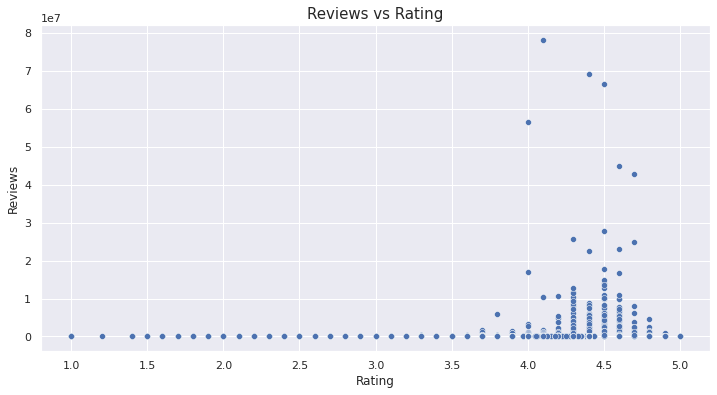

In [106]:
# Visualizing relationship between reviews and rating.
plt.figure(figsize=(12,6))
sns.scatterplot(y='Reviews',x='Rating',data=data_df)
plt.title('Reviews vs Rating', fontsize=15)
plt.show()

**Observations**
1. Higher number of reviews do improve average rating.
2. Reviews also shows popularity of apps.

Let's have a look on top reviewd apps.

In [107]:
# Top Reviewed Apps
data_df.sort_values(by='Reviews',ascending=False)[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Category
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Variable
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Variable
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,Variable
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Variable
1879,Clash of Clans,GAME,4.6,44893888,98.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up,50+ MB
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,500000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device,Variable
1872,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,50+ MB
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,Variable
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device,Variable
1878,Clash Royale,GAME,4.6,23136735,97.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up,50+ MB


In [108]:
# Review Ratio of free vs paid apps
reviews_info = data_df.groupby('Type')[['Reviews','Installs']].sum()
reviews_info.reset_index(inplace=True)
reviews_info['Review Ratio'] = reviews_info['Reviews'] / reviews_info['Installs']
reviews_info

,Type,Reviews,Installs,Review Ratio
0,Free,2087514921,75265163646,0.027735
1,Paid,6596000,57363781,0.114985


**Observations**
1. Meta Franchise's apps are **most** reviewd, it looks like they encourage users to review the app.
2. **Paid** apps are reviewd most as compared to free apps.
3. There's **high** probabilty of app being reviewd if it's paid.

Let's see number of reviews across categories.

In [109]:
reviews_by_category = data_df.groupby('Category')['Reviews'].sum().reset_index()
reviews_by_category.sort_values(by='Reviews',ascending=False,inplace=True)
reviews_by_category.head()                                   

,Category,Reviews
14,GAME,590772190
6,COMMUNICATION,285824082
29,TOOLS,229471649
27,SOCIAL,227936355
11,FAMILY,193470282


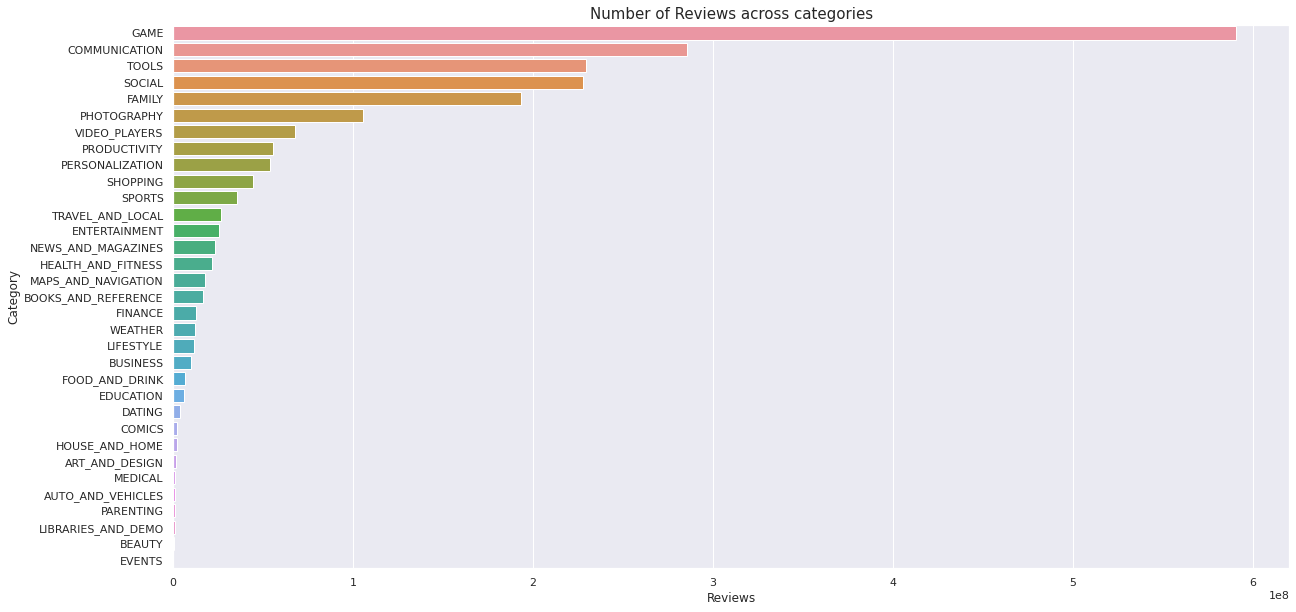

In [110]:
# Plotting the frequency distribution of Reviews across categories.
plt.figure(figsize=(20,10))
sns.barplot(y='Category',x='Reviews',data=reviews_by_category)
plt.title('Number of Reviews across categories',size=15)
plt.show()

**Observations**
1. People are more enthusiastic when it comes to **Game**. There is very high probability of game being reviewd.
2. After Game, Communicatio, Tools, Social and Family categories apps are reviewd most.
3. People usually **don't** review apps belonging to Events, Beauty, Libraries and demo, parenting or auto and vehicles.

### Do people install most reviewd Apps ?

Let's answer this question using graph.

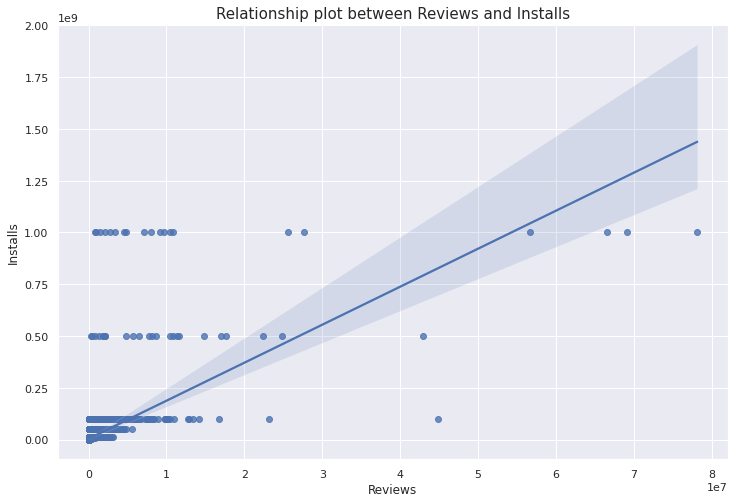

In [111]:
# Plotting Installs vs Reviews
plt.figure(figsize=(12,8))
sns.regplot(x='Reviews',y='Installs',data=data_df)
plt.title('Relationship plot between Reviews and Installs',size=15)
plt.show()

In [112]:
data_df[['Installs','Reviews']].corr()

,Installs,Reviews
Installs,1.000000,0.625059
Reviews,0.625059,1.000000


**Observations**
1. There is a positive correlation between Installs and Reviews with strength of 0.63 out of 1.
2. It can be said people tends to download most reviewd apps.

## 2.<u><b> Users Reviews

In [113]:
# Getting the shape of data
reviews_df.shape

(29697, 5)

In [114]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29697 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29697 non-null  object 
 1   Translated_Review       29697 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [115]:
# Top 5 rows.
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


### Users Sentiments in general.

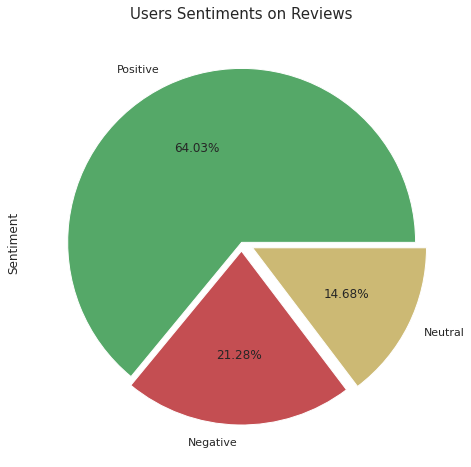

In [116]:
# Plotting the pie-chart
reviews_df['Sentiment'].value_counts().plot(kind='pie',
                                            figsize=(10,8),
                                            autopct='%1.2f%%',
                                            explode=[0.0,0.05,0.07],
                                            colors=['g','r','y'])

plt.title('Users Sentiments on Reviews',size=15)
plt.show()

**Observations**
1. The android community is quite **optimastic**.
2. There is **significant** portion of people having neutral sentiments.
3. The most **important** is to focus on customers having negative sentiments about app and work on their issues.

### Sentiment Polarity

Sentiment Polarity measures the strength of opinion in range [-1,1].<br>
**1** being the best case and **-1** being the worst.

In [117]:
# Summary Statistics of Sentiment Polarity.
reviews_df['Sentiment_Polarity'].describe()

count    29697.000000
mean         0.188836
std          0.355672
min         -1.000000
25%          0.000000
50%          0.157143
75%          0.422500
max          1.000000
Name: Sentiment_Polarity, dtype: float64

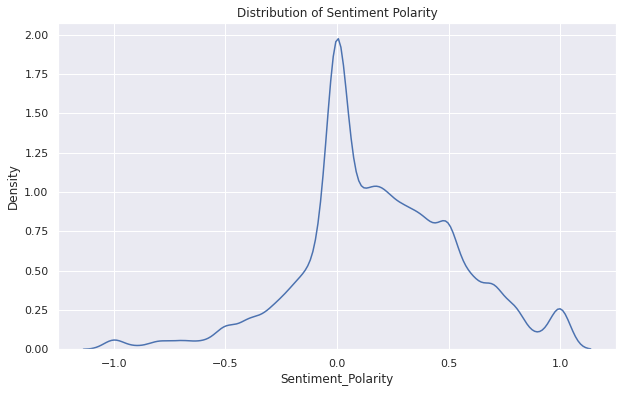

In [118]:
# Distribution of Sentiment Polarity.
plt.figure(figsize=(10,6))
sns.kdeplot(x='Sentiment_Polarity', data=reviews_df)
plt.title('Distribution of Sentiment Polarity')
plt.show()

**Observations**
1. There is **huge** standard deviation among opinion of people. The median polarity is **0.15** which is quite low.
2. But, we have seen there are more positive reviews than negative, this means for worst apps, people are very **harsh**.

Let's see top 20 positive rated apps on basis of sentiment polarity on the condition having more than 20 reviews.

In [119]:
# Getting summary statistics for each app.
app_grp = reviews_df.groupby('App')['Sentiment_Polarity']
app_grp = app_grp.agg(['median','count'])\
                        .reset_index()\
                        .sort_values(by='median',ascending=False)

# Filtering out apps having more than 20 reviews.
top20_positive = app_grp[app_grp['count'] > 20][:20] 
top20_positive

,App,median,count
483,Door Lock Screen,0.600000,35
262,Brasileirão Pro 2018 - Série A e B,0.600000,36
393,Cookbook Recipes,0.593750,37
289,C++ Tutorials,0.583333,36
86,"All Football GO- Live Score, Games",0.575000,36
828,High Blood Pressure Symptoms,0.558333,35
844,Home Workout for Men - Bodybuilding,0.556250,25
730,Goku Wallpaper Art,0.550000,35
23,850 Sports News Digest,0.550000,39
733,Golden Launcher,0.550000,34


### Sentiment Subjectivity

Sentiment subjectivity measures to what strength a person's opinion is personal. <br>
It lies in the range [0,1]

In [120]:
# Summary statistics for Sentiment Subjectivity.
reviews_df['Sentiment_Subjectivity'].describe()

count    29697.000000
mean         0.490848
std          0.266029
min          0.000000
25%          0.350000
50%          0.514286
75%          0.652500
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

In [121]:
sum(reviews_df['Sentiment_Subjectivity']==0)

3767

**Observations**
1. On an average, reviews are **50%** related to personal usage.
2. There are some cases, where reviews are general, not related to personal opinion.
3. The mean and median are almost equal.

Let's see Top Apps for which people has given personal opinions and it'll give an idea which app has particular **influence** in people's life according to Subjectivity measure.

In [122]:
# Getting list of top 20 Apps according to subjective opinion.
reviews_df.groupby('App')['Sentiment_Subjectivity'].median().reset_index()\
                         .sort_values(by='Sentiment_Subjectivity',
                                      ascending=False)[:20]

,App,Sentiment_Subjectivity
756,Google Slides,0.916667
757,Google Street View,0.783333
357,Choice Hotels,0.771032
23,850 Sports News Digest,0.750000
837,Hitwe - meet people and chat,0.750000
836,Hipmunk Hotels & Flights,0.750000
435,Daily Workouts - Exercise Fitness Routine Trainer,0.750000
805,Happy Birthday Songs Offline,0.716667
630,FlipaClip - Cartoon animation,0.702381
147,Aviary Stickers: Free Pack,0.700000


## 3.<u>Combined Analysis

Let's join the both datasets and use the groupby by `App` for analysis.

In [123]:
# Joining both datsets on 'App' common column.
master_df = pd.merge(data_df,reviews_df,on='App',how='inner')
master_df.shape, master_df.columns

((28255, 18),
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver', 'Size_Category', 'Translated_Review', 'Sentiment',
        'Sentiment_Polarity', 'Sentiment_Subjectivity'],
       dtype='object'))

In [124]:
# Top 3 rows.
master_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Category,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,30-50 MB,It's...a coloring book ap. And I like adult co...,Positive,0.216667,0.57381
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,30-50 MB,wanted access pictures. I denied let app. Don'...,Neutral,0.000000,0.00000
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,30-50 MB,Way many ads... im paying 8$USD pictures color...,Positive,0.300000,0.60000


In [125]:
# Check for null values to be sure.
master_df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Size_Category             0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

There are no missing values. <br> Good to go for analysis.

### User sentiments for free and paid apps.

In [126]:
master_df.groupby('Type')['Sentiment'].value_counts(normalize=True) * 100

Type  Sentiment
Free  Positive     64.077705
      Negative     21.490412
      Neutral      14.431883
Paid  Positive     75.577558
      Negative     16.501650
      Neutral       7.920792
Name: Sentiment, dtype: float64

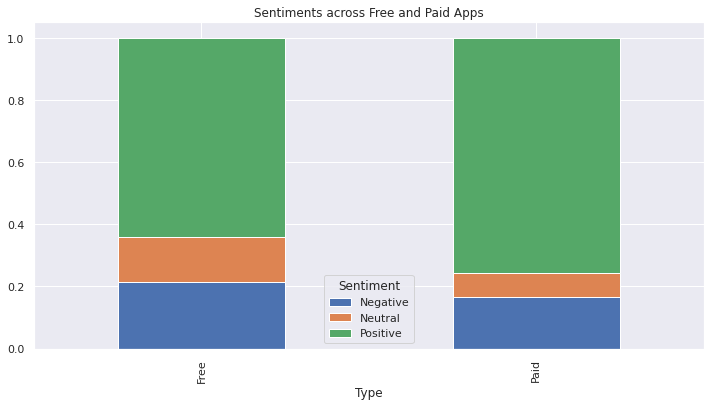

In [127]:
master_df.groupby('Type')['Sentiment'].value_counts(normalize=True)\
                                      .unstack()\
                                      .plot(kind='bar',stacked=True,
                                            figsize=(12,6))
plt.title('Sentiments across Free and Paid Apps')
plt.show()                                      

**Observations**
1. **Paid** apps has high ratio of **positive** sentiments compared to free apps.
2. **Free** apps has high percentage of **negative** sentiments.

###  Sentiments across categories.

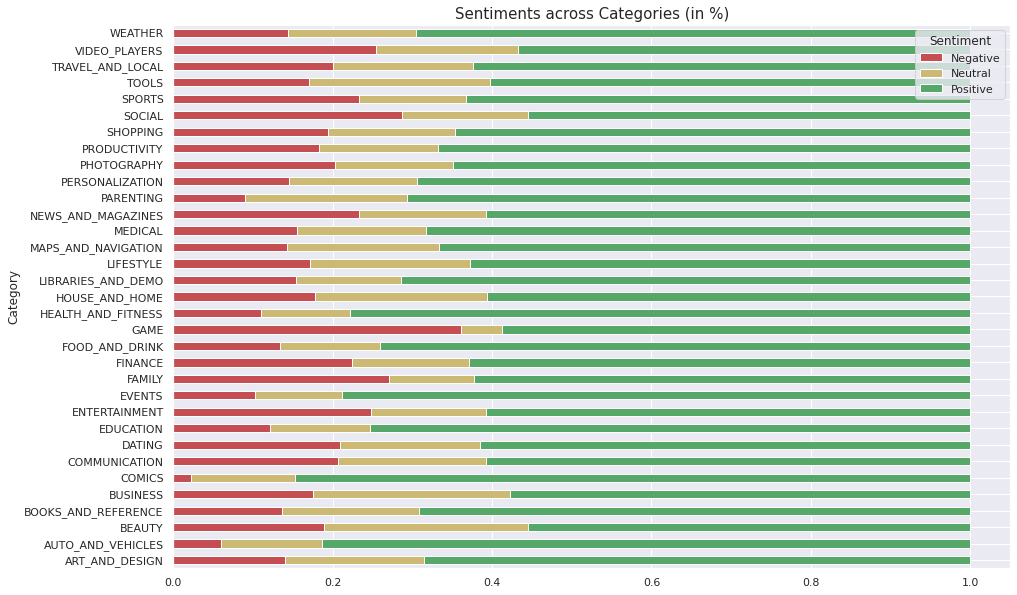

In [128]:
# Plotting the category wise sentiments normalized values.
cat_wise_sent = master_df.groupby('Category')['Sentiment']\
                                          .value_counts(normalize=True)\
                                          .unstack()\
                                          .plot(kind='barh',stacked=True,
                                            figsize=(15,10),color=['r','y','g'])

plt.title('Sentiments across Categories (in %)',size=15)
plt.show()

**Observations**
1. Comics, Events, Auto and Vehicles, Health and Fitness tops the list with most number of positive sentiments.
2. People have slightly negative sentiments towards apps from Game,Social and Video Players.


### Sentiment Polarity for different sizes.

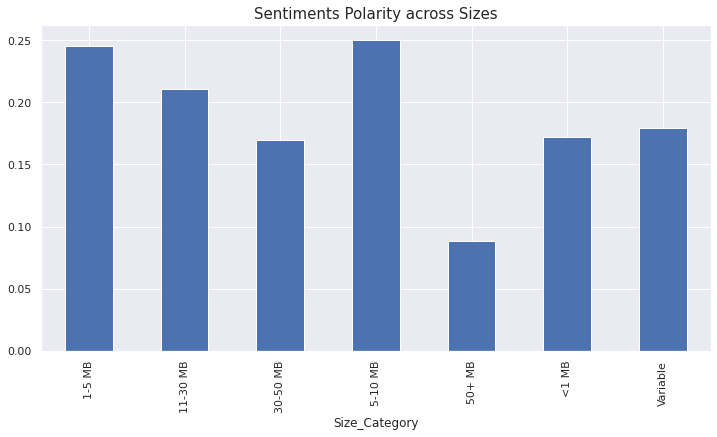

In [129]:
# Plotting the sentiments polarity for size category.
master_df.groupby('Size_Category')['Sentiment_Polarity'].mean()\
                                                        .plot(kind='bar',
                                                             figsize=(12,6))
plt.title('Sentiments Polarity across Sizes',size=15)
plt.show()

**Observations**
1. Android users has high positive sentiments towards lite apps of size 1-10 MB.
2. Apps over 50MB has lowest sentiments among all category.

### Frequent words in positive and negative sentiments.

In [130]:
# Importing the required libraries for WordCloud visualization.
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [131]:
# Defining a function to get clean words from text.
def clean_words(text):
    ''' This function returns clean words list from given text.'''
    words_list = text.lower().strip().split()
    clean_words = [word for word in words_list if word.isalpha()]
    clean_words = [word for word in clean_words if word not in STOPWORDS]
    return ' '.join(clean_words)

1. Positive Sentiments Words

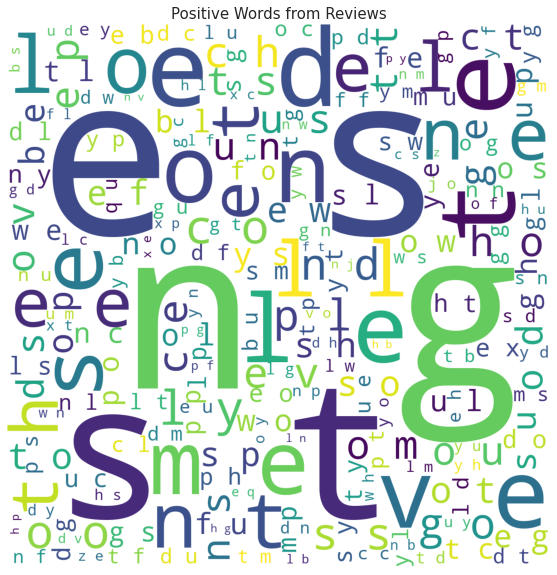

In [132]:
# Getting the word list.
pos_sentiments = master_df[master_df['Sentiment']=='Positive']
positive_words = clean_words(' '.join(pos_sentiments['Translated_Review']))
positive_text = ' '.join(positive_words)

# Plotting the wordcloud
wordcloud = WordCloud(background_color='white',
                     width=1200,
                     height=1200).generate(positive_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Positive Words from Reviews', loc='center', fontsize=15)
plt.show()

2. Negative Sentiments Words

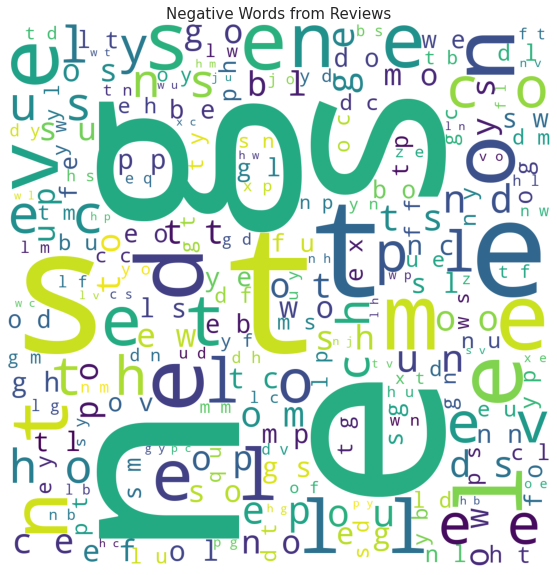

In [133]:
# Getting the word list.
neg_sentiments = master_df[master_df['Sentiment']=='Negative']
negative_words = clean_words(' '.join(neg_sentiments['Translated_Review']))
negative_text = ' '.join(negative_words)

# Plotting the wordcloud
wordcloud = WordCloud(background_color='white',
                     width=1200,
                     height=1200).generate(negative_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative Words from Reviews', loc='center', fontsize=15)
plt.show()

**Observations** 
1. **Positive** words in reviews most frequently occuring are - great, good,best,love,easy,free 
2. **Negative** words in reviews most frequently occuring are -bad,make,please,even,time,ad,stupid,annoying,hate 
3. Some **words** are present in both - need, game,make

## **Conclusion**

1. The median rating for an app is 4.2
2. Most of the apps have rating above 4.
3. More than 90% of the apps are free.
4. Apps having variable sizes have better average rating.
5. Most of the apps has size between 5-30MB 